# They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

In [1]:
import os
import pandas as pd
from botocore.client import Config
import ibm_boto3
import io
import matplotlib.pyplot as plt

# Define a function to load the pickle file from IBM COS
def load_pickle_from_cos(bucket, key, client):
    # Get the object from the bucket
    response = client.get_object(Bucket=bucket, Key=key)
    
    # Read the object content
    object_content = response['Body'].read()
    
    # Load the pickle file into a DataFrame
    df = pd.read_pickle(io.BytesIO(object_content))
    return df

# Initialize the COS client
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MjJB2foti-ACb0aum6tpr_MABhlskLbgK4djDXeXLltL',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'task410-donotdelete-pr-fck0m7flgp8x29'
object_key = 'task4.9_part1.pkl'

# Load the DataFrame
df = load_pickle_from_cos(bucket, object_key, cos_client)

# Display the first few rows of the DataFrame
print(df.head())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered eval_set  \
0                     NaN         196                  1          0    prior   
1                    15.0         196                  1          1    prior   
2                    21.0         196                  1          1    prior   
3                    29.0         196                  1          1    prior   
4                    28.0         196                  1          1    prior   

   ...   order_frequency_flag  first_name  surname  gender    state   age  \
0  ...  Non-frequent customer    

In [2]:
import seaborn as sns

In [3]:
# Calculate the total spending for each hour of the day
hourly_spending = df.groupby('order_hour_of_day')['prices'].sum()

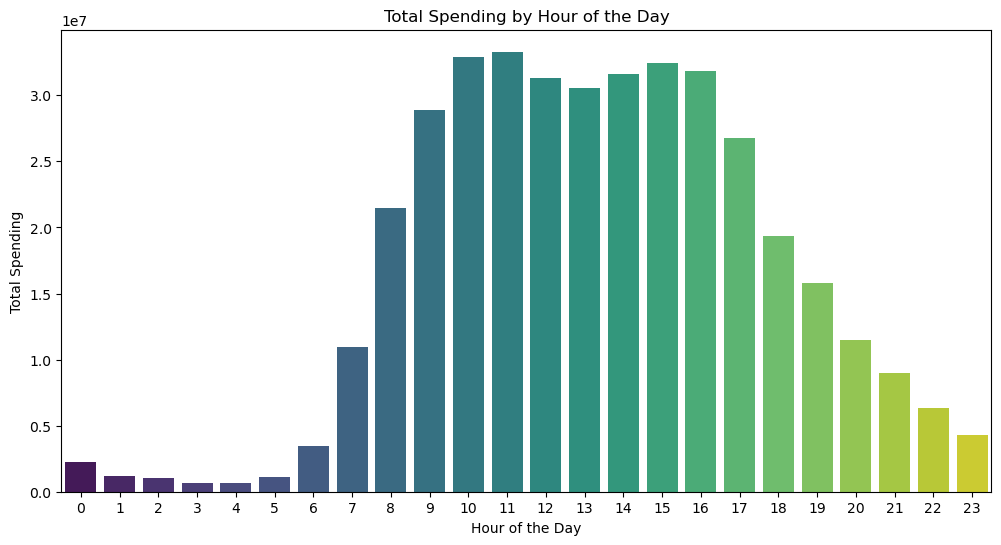

In [4]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_spending.index, y=hourly_spending.values, palette="viridis")
plt.title('Total Spending by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Spending')
plt.show()

#### Insights:
- The total spending is highest during the late morning and early afternoon hours, particularly between 10 AM and 3 PM.
- There is a noticeable peak in spending around 11 AM.
- Early morning hours (before 8 AM) and late evening hours (after 8 PM) have the lowest total spending.

These insights can help the sales team at Instacart decide which types of products to advertise at specific times of the day. For example, they might focus on promoting products that are typically purchased in the morning during peak spending hours, and different types of products during the evening when spending is lower.
